<a href="https://colab.research.google.com/github/mnfibin/AI-ML-Internship-Elevate_Labs/blob/main/AI-ML-Internship-Elevate_Labs/Task%205/Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DECISION TREES AND RANDOM FORESTS IMPLEMENTATION


###*BY FIBIN MN*

In [5]:
# Install required packages
!pip install scikit-learn graphviz pandas numpy matplotlib seaborn -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## STEP 1: LOAD AND EXPLORE THE DATASET

In [6]:
print("\n[STEP 1] Loading Heart Disease Dataset...")

# Upload dataset from local storage
from google.colab import files
print("Please upload your heart disease dataset CSV file...")
uploaded = files.upload()

# Get the uploaded filename
filename = list(uploaded.keys())[0]
print(f"\n✓ File '{filename}' uploaded successfully!")

# Load the dataset
df = pd.read_csv(filename)

print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nTarget distribution:\n{df['target'].value_counts()}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nDataset info:")
print(df.info())
print(f"\nMissing values:\n{df.isnull().sum()}")


[STEP 1] Loading Heart Disease Dataset...
Please upload your heart disease dataset CSV file...


Saving heart.csv to heart.csv

✓ File 'heart.csv' uploaded successfully!
Dataset shape: (1025, 14)

Column names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Target distribution:
target
1    526
0    499
Name: count, dtype: int64

First few rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
R

# STEP 2: PREPARE DATA FOR TRAINING

In [7]:
print("\n[STEP 2] Preparing data for training...")

X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


[STEP 2] Preparing data for training...
Training set size: 820
Test set size: 205


# STEP 3: TRAIN DECISION TREE CLASSIFIER

In [8]:
print("\n[STEP 3] Training Decision Tree Classifier...")

# Train a simple decision tree (prone to overfitting)
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)

# Train a controlled decision tree
dt_controlled = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_controlled.fit(X_train, y_train)

# Evaluate both models
train_acc_overfit = dt_overfit.score(X_train, y_train)
test_acc_overfit = dt_overfit.score(X_test, y_test)
train_acc_controlled = dt_controlled.score(X_train, y_train)
test_acc_controlled = dt_controlled.score(X_test, y_test)

print(f"\nOverfitted Tree:")
print(f"  Train Accuracy: {train_acc_overfit:.4f}")
print(f"  Test Accuracy:  {test_acc_overfit:.4f}")
print(f"  Overfitting Gap: {train_acc_overfit - test_acc_overfit:.4f}")

print(f"\nControlled Tree (max_depth=5):")
print(f"  Train Accuracy: {train_acc_controlled:.4f}")
print(f"  Test Accuracy:  {test_acc_controlled:.4f}")
print(f"  Overfitting Gap: {train_acc_controlled - test_acc_controlled:.4f}")


[STEP 3] Training Decision Tree Classifier...

Overfitted Tree:
  Train Accuracy: 1.0000
  Test Accuracy:  0.9854
  Overfitting Gap: 0.0146

Controlled Tree (max_depth=5):
  Train Accuracy: 0.9085
  Test Accuracy:  0.8878
  Overfitting Gap: 0.0207


# STEP 4: VISUALIZE DECISION TREE


[STEP 4] Visualizing Decision Tree...


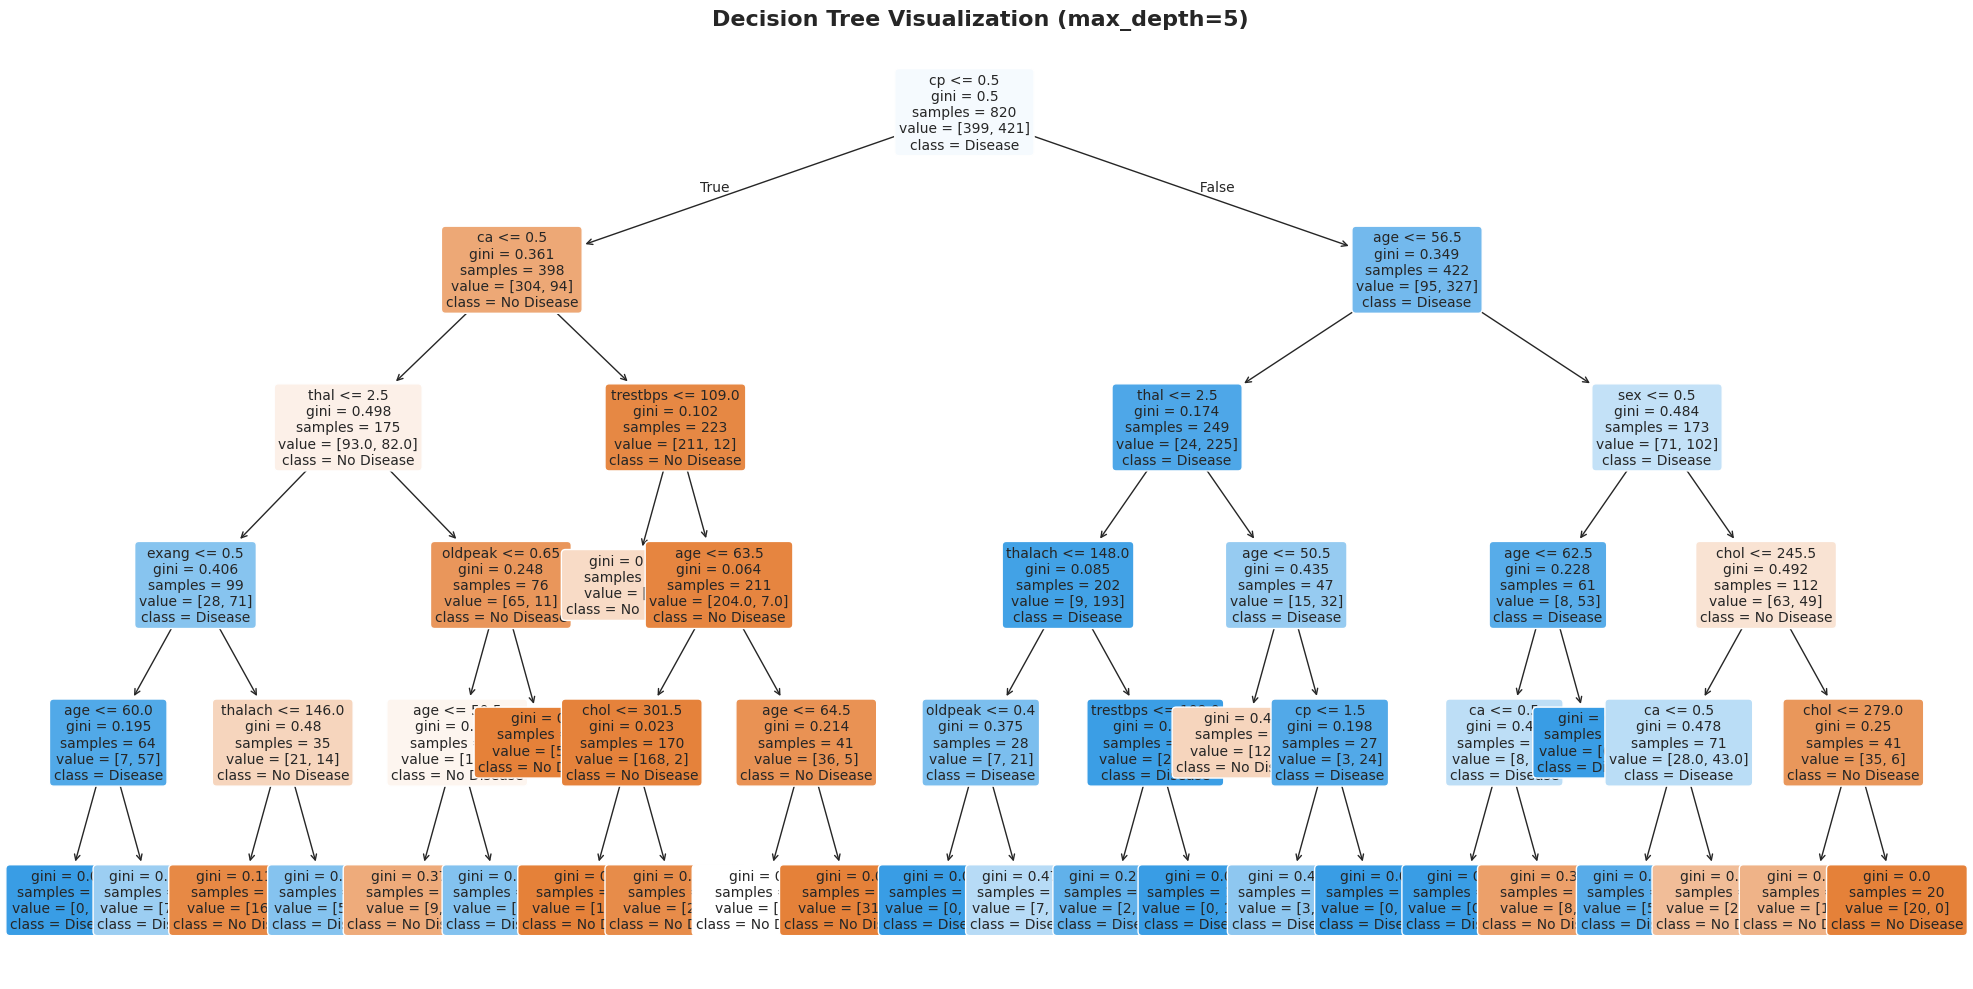

✓ Decision tree visualization saved as 'decision_tree_visualization.png'


In [9]:
print("\n[STEP 4] Visualizing Decision Tree...")

plt.figure(figsize=(20, 10))
plot_tree(dt_controlled,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (max_depth=5)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Decision tree visualization saved as 'decision_tree_visualization.png'")

# STEP 5: ANALYZE OVERFITTING WITH DIFFERENT DEPTHS


[STEP 5] Analyzing overfitting across different tree depths...


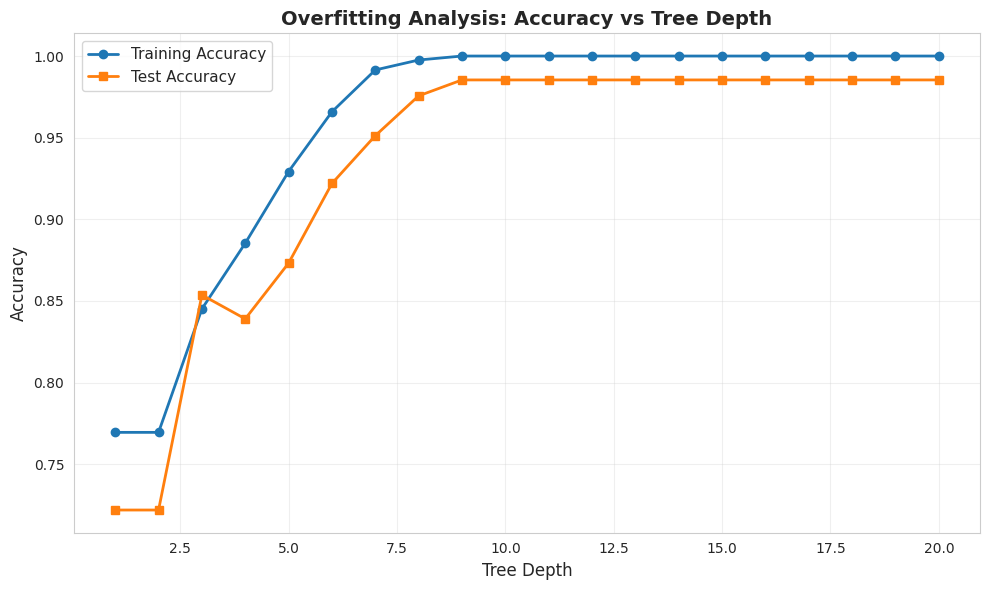

✓ Optimal tree depth: 9 (Test Accuracy: 0.9854)


In [10]:
print("\n[STEP 5] Analyzing overfitting across different tree depths...")

depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(dt.score(X_train, y_train))
    test_scores.append(dt.score(X_test, y_test))

# Plot overfitting analysis
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_scores, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Tree Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Overfitting Analysis: Accuracy vs Tree Depth', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('overfitting_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

optimal_depth = depths[np.argmax(test_scores)]
print(f"✓ Optimal tree depth: {optimal_depth} (Test Accuracy: {max(test_scores):.4f})")

# STEP 6: TRAIN RANDOM FOREST CLASSIFIER

In [12]:
print("\n[STEP 6] Training Random Forest Classifier...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_controlled.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
dt_accuracy = accuracy_score(y_test, y_pred_dt)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\nModel Comparison:")
print(f"  Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"  Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"  Improvement: {rf_accuracy - dt_accuracy:.4f}")


[STEP 6] Training Random Forest Classifier...

Model Comparison:
  Decision Tree Accuracy: 0.8878
  Random Forest Accuracy: 0.9756
  Improvement: 0.0878


# STEP 7: FEATURE IMPORTANCE ANALYSIS


[STEP 7] Analyzing Feature Importances...

Top 5 Important Features (Decision Tree):
   Feature  Importance
2       cp    0.391050
11      ca    0.164614
0      age    0.131177
12    thal    0.110547
1      sex    0.047885

Top 5 Important Features (Random Forest):
    Feature  Importance
2        cp    0.155917
11       ca    0.125937
7   thalach    0.107516
12     thal    0.105603
9   oldpeak    0.104751


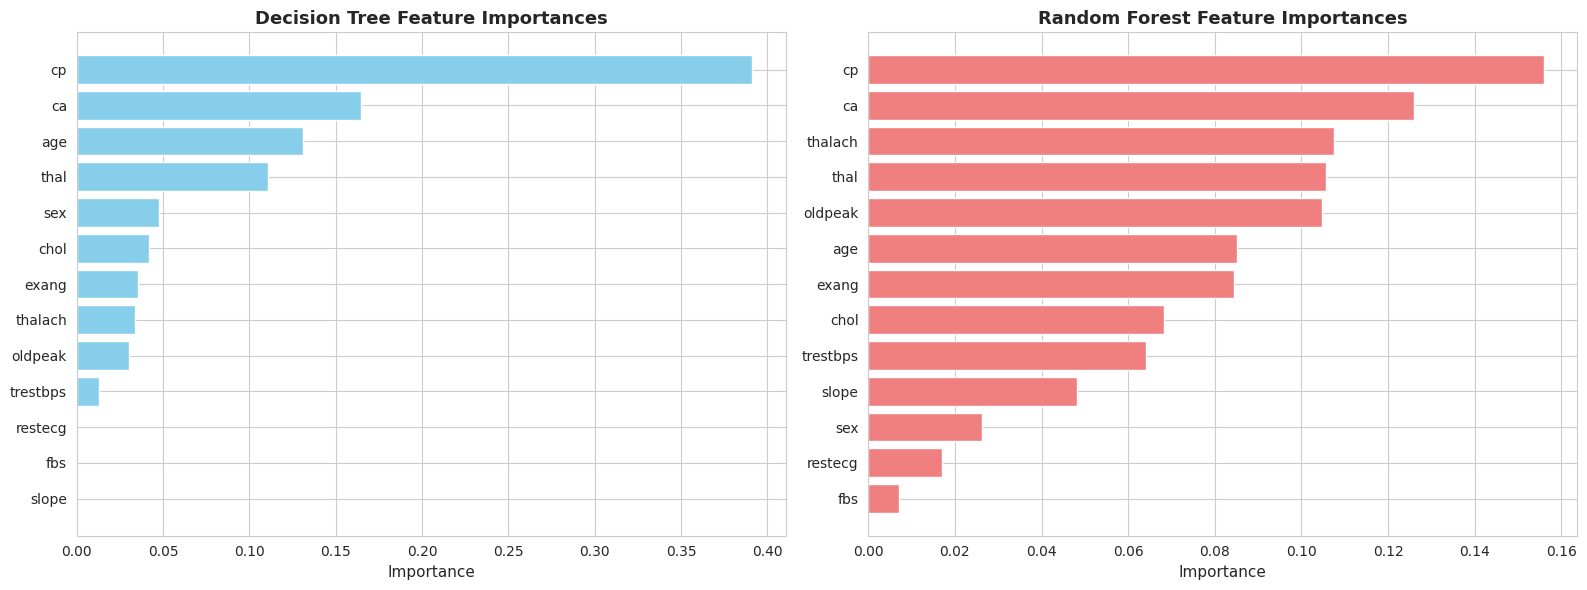

In [13]:
print("\n[STEP 7] Analyzing Feature Importances...")

# Get feature importances
dt_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_controlled.feature_importances_
}).sort_values('Importance', ascending=False)

rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 5 Important Features (Decision Tree):")
print(dt_importances.head())

print(f"\nTop 5 Important Features (Random Forest):")
print(rf_importances.head())

# Visualize feature importances
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree
axes[0].barh(dt_importances['Feature'], dt_importances['Importance'], color='skyblue')
axes[0].set_xlabel('Importance', fontsize=11)
axes[0].set_title('Decision Tree Feature Importances', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()

# Random Forest
axes[1].barh(rf_importances['Feature'], rf_importances['Importance'], color='lightcoral')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].set_title('Random Forest Feature Importances', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()


# STEP 8: CROSS-VALIDATION EVALUATION


[STEP 8] Performing Cross-Validation...

Cross-Validation Results (5-Fold):
  Decision Tree:
    Mean Accuracy: 0.8683 (+/- 0.0183)
  Random Forest:
    Mean Accuracy: 0.9598 (+/- 0.0412)


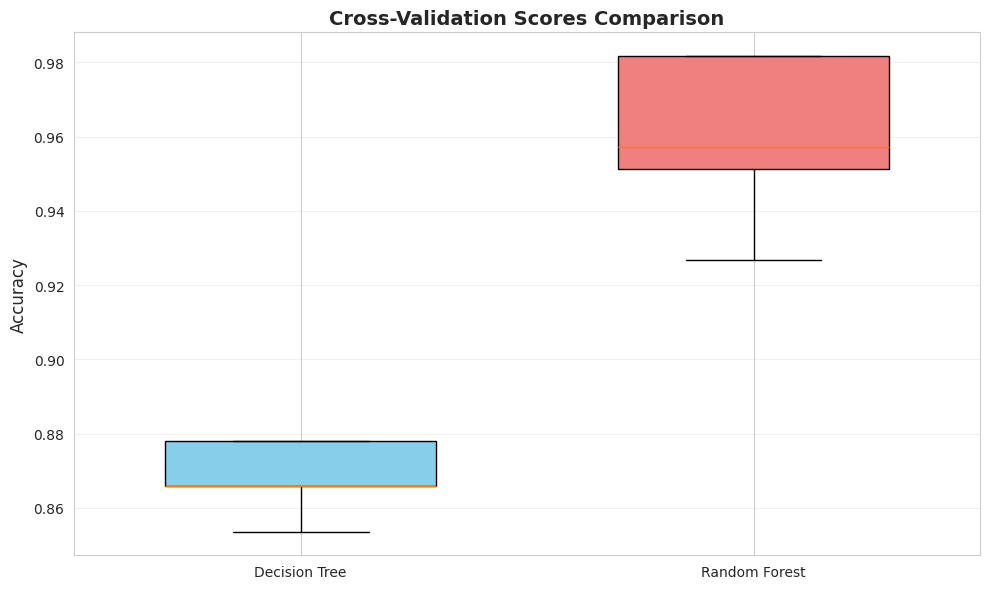

In [14]:
print("\n[STEP 8] Performing Cross-Validation...")

# 5-Fold Cross-Validation
cv_scores_dt = cross_val_score(dt_controlled, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"\nCross-Validation Results (5-Fold):")
print(f"  Decision Tree:")
print(f"    Mean Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")
print(f"  Random Forest:")
print(f"    Mean Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# Visualize CV scores
fig, ax = plt.subplots(figsize=(10, 6))
positions = [1, 2]
bp = ax.boxplot([cv_scores_dt, cv_scores_rf],
                 positions=positions,
                 labels=['Decision Tree', 'Random Forest'],
                 patch_artist=True,
                 widths=0.6)

colors = ['skyblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Cross-Validation Scores Comparison', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('cross_validation_scores.png', dpi=300, bbox_inches='tight')
plt.show()

# STEP 9: CONFUSION MATRIX


[STEP 9] Generating Confusion Matrices...


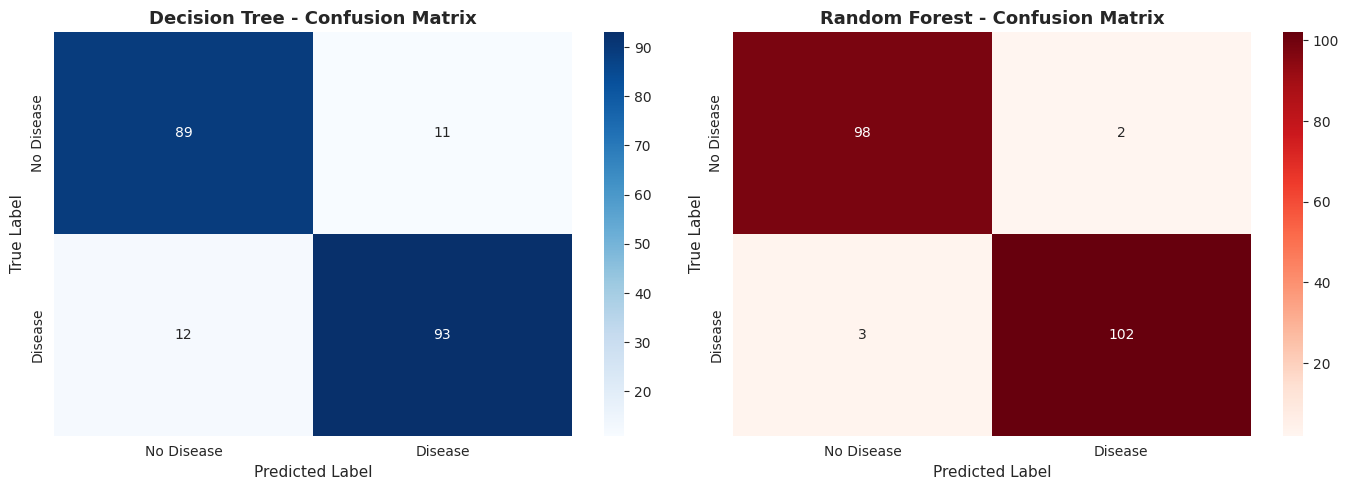

In [15]:
print("\n[STEP 9] Generating Confusion Matrices...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[0].set_title('Decision Tree - Confusion Matrix', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=11)
axes[0].set_xlabel('Predicted Label', fontsize=11)

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
axes[1].set_title('Random Forest - Confusion Matrix', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=11)
axes[1].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


# STEP 10: CLASSIFICATION REPORTS


In [16]:
print("\n[STEP 10] Final Classification Reports...")

print("\n" + "="*60)
print("DECISION TREE - CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_dt, target_names=['No Disease', 'Disease']))

print("\n" + "="*60)
print("RANDOM FOREST - CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease']))



[STEP 10] Final Classification Reports...

DECISION TREE - CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Disease       0.88      0.89      0.89       100
     Disease       0.89      0.89      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205


RANDOM FOREST - CLASSIFICATION REPORT
              precision    recall  f1-score   support

  No Disease       0.97      0.98      0.98       100
     Disease       0.98      0.97      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



# SUMMARY

In [18]:
print("\n" + "="*60)
print("SUMMARY OF RESULTS")
print("="*60)
print(f"✓ Decision Tree Test Accuracy: {dt_accuracy:.4f}")
print(f"✓ Random Forest Test Accuracy: {rf_accuracy:.4f}")
print(f"✓ Random Forest shows {(rf_accuracy - dt_accuracy)*100:.2f}% improvement")
print(f"✓ Optimal tree depth found: {optimal_depth}")
print(f"✓ Top 3 important features: {', '.join(rf_importances['Feature'].head(3).tolist())}")
print(f"✓ All visualizations saved successfully!")
print("="*60)


SUMMARY OF RESULTS
✓ Decision Tree Test Accuracy: 0.8878
✓ Random Forest Test Accuracy: 0.9756
✓ Random Forest shows 8.78% improvement
✓ Optimal tree depth found: 9
✓ Top 3 important features: cp, ca, thalach
✓ All visualizations saved successfully!
